# View/Analyze Storage and Skew

In [1]:
%matplotlib inline

import dg.conn
from dg.admin import disk
con = dg.conn.Conn("host=localhost dbname=tpch1f")
print (con.ver)

4


In [2]:
xt = disk.xt_disk(con)
print(xt.show())

+------------------+-----------+--------------------+----------+
| tabname          |   totalsz |   skew_coefficient |   skewsz |
|------------------+-----------+--------------------+----------|
| public.nation    |     98304 |         18.3303    |     6006 |
| public.region    |     65536 |         91.6515    |    20022 |
| public.part      |  31064064 |          0.075035  |     7770 |
| public.supplier  |   1769472 |          0.504083  |     2973 |
| public.partsupp  | 145817600 |          0.075035  |    36471 |
| public.customer  |  29458432 |          0.132408  |    13002 |
| public.orders    | 210894848 |          0.0219973 |    15464 |
| public.lineitem  | 850427904 |          0.081926  |   232241 |
| public.tt        |         0 |          0         |        0 |
| dg_utils.eachseg |     98304 |          0         |        0 |
| xw.xt            |    229376 |          9.64365   |     7373 |
+------------------+-----------+--------------------+----------+


In [3]:
rows = xt.execute()

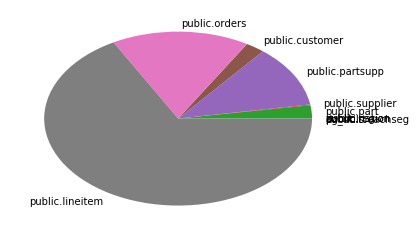

In [4]:
# Plot.  

import dg.dsutil.plot

pc = dg.dsutil.plot.PieChart(xt.coldata('totalsz', rows), labels=xt.coldata('tabname', rows))
pc.draw()